<a href="https://colab.research.google.com/github/FHShubho/plant_disease_classification/blob/main/Plant_Diseases_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and Importing Libraries

In [ ]:
!pip install split-folders tqdm

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import splitfolders

Preparing Data

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/plant diseases/splited.zip" -d "/content/drive/MyDrive/Colab Notebooks/plant diseases/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab Notebooks/plant diseases/splited/train/Tomato___Target_Spot/ae76de40-45a1-4bb2-b3cf-dc1ac5c3ef8c___Com.G_TgS_FL 8319.JPG  
  inflating: /content/drive/MyDrive/Colab Notebooks/plant diseases/splited/train/Tomato___Target_Spot/aed4284a-98bb-4fab-a2de-764f5a3fda68___Com.G_TgS_FL 0927.JPG  
  inflating: /content/drive/MyDrive/Colab Notebooks/plant diseases/splited/train/Tomato___Target_Spot/af120bd7-a1ad-44e4-bfc5-ddd53f1ef792___Com.G_TgS_FL 8240.JPG  
  inflating: /content/drive/MyDrive/Colab Notebooks/plant diseases/splited/train/Tomato___Target_Spot/af156939-f96f-4b7a-bd93-a5ebde95fc14___Com.G_TgS_FL 1036.JPG  
  inflating: /content/drive/MyDrive/Colab Notebooks/plant diseases/splited/train/Tomato___Target_Spot/b0724e2b-9a46-4907-a500-0571e072dc25___Com.G_TgS_FL 9715.JPG  
  inflating: /content/drive/MyDrive/Colab Notebooks/plant diseases/splited/train/Tomato___Target_Spot/b0e42bb8-f979-4fc3-a26

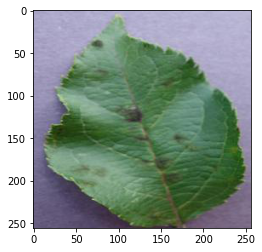

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/plant diseases/color/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img = plt.imread(image_path)
plt.imshow(img)

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/plant diseases/splited/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/plant diseases/splited/test'

In [ ]:
img_size = (256, 256, 3)
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [ ]:
train_images = image_gen.flow_from_directory(train_path,
                                              target_size=img_size[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical'
                                            )

Found 43429 images belonging to 38 classes.


In [ ]:
test_images = image_gen.flow_from_directory(test_path,
                                            target_size=img_size[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            class_mode='categorical'
                                            )

Found 10876 images belonging to 38 classes.


In [ ]:
train_images.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
type(train_images.class_indices)

dict

In [ ]:
labels = []
for key, value in train_images.class_indices.items():
  labels.append(key)
labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

 Creating CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import tensorflow as tf
from keras import backend as K

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=img_size))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(38))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
activation_14 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_15 (Activation)   (None, 85, 85, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Training Model

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
results = model.fit(train_images, epochs=25, validation_data=test_images, steps_per_epoch=200, verbose=1)

Epoch 1/25
200/200 [==============================] - 250s 1s/step - loss: 6.0773 - accuracy: 0.4052 - val_loss: 23.6666 - val_accuracy: 0.0669
Epoch 2/25
200/200 [==============================] - 247s 1s/step - loss: 3.7778 - accuracy: 0.5606 - val_loss: 26.6568 - val_accuracy: 0.0374
Epoch 3/25
200/200 [==============================] - 247s 1s/step - loss: 3.6682 - accuracy: 0.6206 - val_loss: 14.4325 - val_accuracy: 0.1675
Epoch 4/25
200/200 [==============================] - 245s 1s/step - loss: 3.2617 - accuracy: 0.6352 - val_loss: 5.5630 - val_accuracy: 0.4031
Epoch 5/25
200/200 [==============================] - 246s 1s/step - loss: 2.4482 - accuracy: 0.6861 - val_loss: 120.1958 - val_accuracy: 0.1175
Epoch 6/25
200/200 [==============================] - 249s 1s/step - loss: 2.4458 - accuracy: 0.6873 - val_loss: 7.3081 - val_accuracy: 0.3629
Epoch 7/25
200/200 [==============================] - 248s 1s/step - loss: 1.8562 - accuracy: 0.7242 - val_loss: 3.9786 - val_accuracy: 0

Save and load model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/plant diseases/plant_diseases.h5')

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/plant diseases/plant_diseases.h5')

Evaluating trained model

In [ ]:
from tensorflow.keras.preprocessing import image
import pandas as pd

In [ ]:
losses = pd.DataFrame(results.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,6.077289,0.405156,23.666647,0.066936
1,3.777804,0.560625,26.656765,0.037422
2,3.668247,0.620625,14.432535,0.167525
3,3.261681,0.635180,5.563026,0.403089
4,2.448219,0.686094,120.195847,0.117506


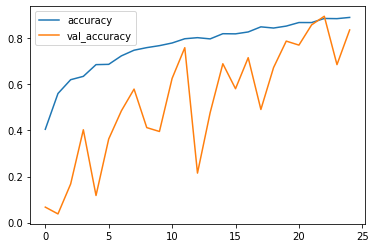

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model_info = model.evaluate(test_images, batch_size=32)
print("Loss: , Accuracy:", model_info)

340/340 [==============================] - 168s 495ms/step - loss: 0.6744 - accuracy: 0.8392
Loss: , Accuracy: [0.6744407415390015, 0.8391872048377991]


Detecting from an image

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/plant diseases/color/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

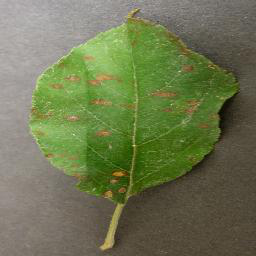

In [ ]:
my_image = image.load_img(path,target_size=img_size)
my_image

In [ ]:
my_image = image.img_to_array(my_image) / 255
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
np.argmax(model.predict(my_image), axis=-1)

array([2])

In [ ]:
labels[np.argmax(model.predict(my_image), axis=-1)[0]]

'Apple___Cedar_apple_rust'